In [99]:
import timeit
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
from IPython.display import Image
from matplotlib import pyplot

data_Central = pd.read_excel('Orders_Central.xlsx')

In [100]:
data_Central.shape

(2323, 24)

In [101]:
data_Central['Region']='Central'
data_Central["Order Date"] = data_Central["Order Year"].astype(str)+'/'+ data_Central["Order Month"].astype(str) +'/' + data_Central["Order Day"].astype(str)

In [102]:
data_Central["Ship Date"] = data_Central["Ship Year"].astype(str)+'/'+ data_Central["Ship Month"].astype(str) +'/' + data_Central["Ship Day"].astype(str)

In [103]:
data_Central = data_Central.drop(columns=['Order Year', 'Order Month', 'Order Day', 'Ship Year', 'Ship Month', 'Ship Day'])

In [104]:
data_Central.shape

(2323, 21)

In [105]:
data_Central = data_Central.rename(columns={"Discounts": "Discount", "Product": "Product Name"})

In [106]:
data_Central.Discount[data_Central.Discount == 'None'] = 0

/home/hooch/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [107]:
data_Central

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Discount,Region,Order Date,Ship Date
0,15,US-2016-118983,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,...,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,-123.8580,0.8,Central,2016/11/22,2016/11/26
1,16,US-2016-118983,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,...,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,-3.8160,0.8,Central,2016/11/22,2016/11/26
2,17,CA-2015-105893,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,Wisconsin,53711,...,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.8800,6,13.3176,0,Central,2015/11/11,2015/11/18
3,22,CA-2017-137330,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,68025,...,Office Supplies,Art,Newell 318,19.4600,7,5.0596,0,Central,2017/12/9,2017/12/13
4,23,CA-2017-137330,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,68025,...,Office Supplies,Appliances,"Acco Six-Outlet Power Strip, 4' Cord Length",60.3400,7,15.6884,0,Central,2017/12/9,2017/12/13
5,35,CA-2018-107727,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,77095,...,Office Supplies,Paper,Easy-staple paper,29.4720,3,9.9468,0.2,Central,2018/10/19,2018/10/23
6,36,CA-2017-117590,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080,...,Technology,Phones,GE 30524EE4,1097.5440,7,123.4737,0.2,Central,2017/12/8,2017/12/10
7,37,CA-2017-117590,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080,...,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,-147.9630,0.6,Central,2017/12/8,2017/12/10
8,38,CA-2016-117415,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,Texas,77041,...,Office Supplies,Envelopes,"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Enve...",113.3280,9,35.4150,0.2,Central,2016/12/27,2016/12/31
9,39,CA-2016-117415,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,Texas,77041,...,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,3,-46.9764,0.32,Central,2016/12/27,2016/12/31


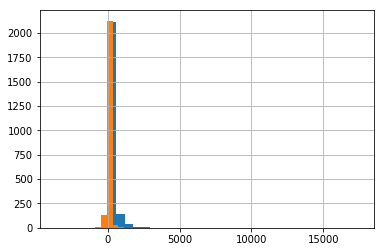

In [108]:
data_Central["Sales"].hist(bins=30)
data_Central["Profit"].hist(bins=30)

In [117]:
data_South_2015=pd.read_csv('data_South_2015.csv')
data_South_2016=pd.read_csv('data_South_2016.csv')
data_South_2017=pd.read_csv('data_South_2017.csv')
data_South_2018=pd.read_csv('data_South_2018.csv')

In [118]:
data_South1= pd.merge(data_South_2015,data_South_2016, how = 'outer')

In [119]:
data_South2=pd.merge(data_South_2017,data_South_2018, how = 'outer')

In [121]:
data_South=pd.merge(data_South1, data_South2, how = 'outer')

In [122]:
data_South.shape

(1620, 21)